In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [30]:
df=pd.read_csv("C:\\Users\\rohis\\Desktop\\skill lync\\youtube projects\\python project-Diwali sales\\Diwali Sales Data.csv",encoding='latin1')

In [31]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [32]:
df.shape

(11251, 15)

In [33]:
#objective for data analysis
#imporve customer experience by analyzing sales data
#increase revenue

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [36]:
#drop unrelated columns
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [37]:
pd.isnull(df)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False,False
11247,False,False,False,False,False,False,False,False,False,False,False,False,False
11248,False,False,False,False,False,False,False,False,False,False,False,False,False
11249,False,False,False,False,False,False,False,False,False,False,False,False,False


In [39]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [41]:
df.shape

(11251, 13)

In [42]:
#dropping null values
df.dropna(inplace=True)

In [43]:
#changing data type of column Amount from float to int
df['Amount']=df['Amount'].astype('int')

In [44]:
df['Amount'].dtypes

dtype('int32')

In [45]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [46]:
#return description of data(count,mean,std,etc )
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [51]:
#describing specific columns
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory data analysis

## Gender

<AxesSubplot:xlabel='Gender', ylabel='count'>

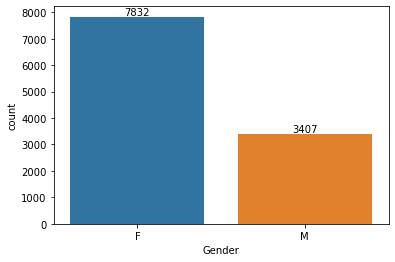

In [50]:
ax=sns.countplot(x='Gender',data=df)
#labels for categories
for bars in ax.containers:
    ax.bar_label(bars)
ax

In [62]:
#as_index=false,...because we want to keep it in data frame format
sales_gen=df.groupby(['Gender'],as_index=False)['Amount'].sum()
sales_gen


,Gender,Amount
0,F,74335853
1,M,31913276


<AxesSubplot:xlabel='Gender', ylabel='Amount'>

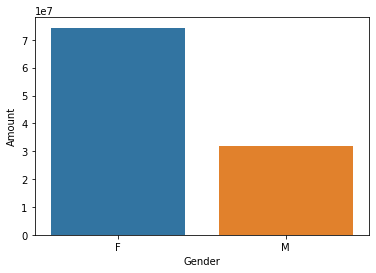

In [60]:
sns.barplot(x = 'Gender',y = 'Amount',data=sales_gen)

#### purchasing done by females is greater than male.

## Age

In [65]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

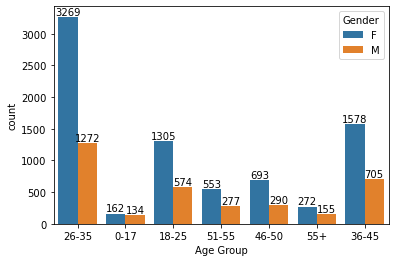

In [68]:
# hue is used get a division between male and female.
ax=sns.countplot(data=df,x='Age Group',hue='Gender')

for bars in ax.containers:
    ax.bar_label(bars)

In [74]:
sales_age=df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sales_age

,Age Group,Amount
2,26-35,42613442
3,36-45,22144994
1,18-25,17240732
4,46-50,9207844
5,51-55,8261477
6,55+,4080987
0,0-17,2699653


<AxesSubplot:xlabel='Age Group', ylabel='Amount'>

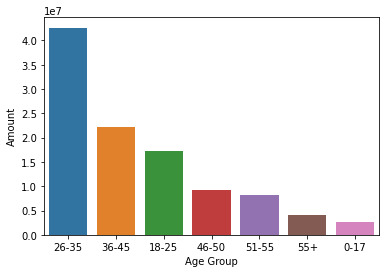

In [78]:
sns.barplot(x='Age Group',y='Amount',data=sales_age)

#### from above graphs we can see that most buyers are women from age group of 26-35

### state

In [79]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [82]:
sales_state=df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False)

<AxesSubplot:xlabel='State', ylabel='Orders'>

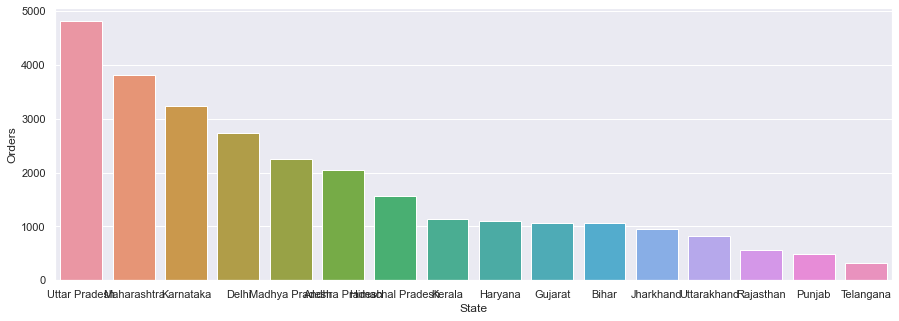

In [87]:
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data=sales_state,x='State',y='Orders')


<AxesSubplot:xlabel='State', ylabel='Orders'>

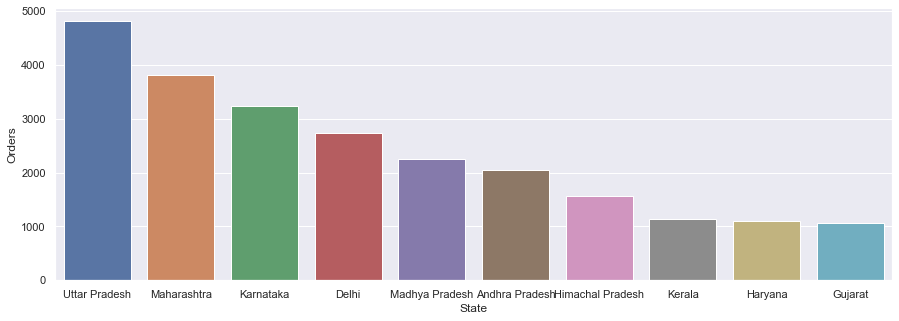

In [88]:
sales_state=df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data=sales_state,x='State',y='Orders')


#### top states in terms of orders are uttar pradesh,maharashtra,karnataka,delhi

<AxesSubplot:xlabel='State', ylabel='Amount'>

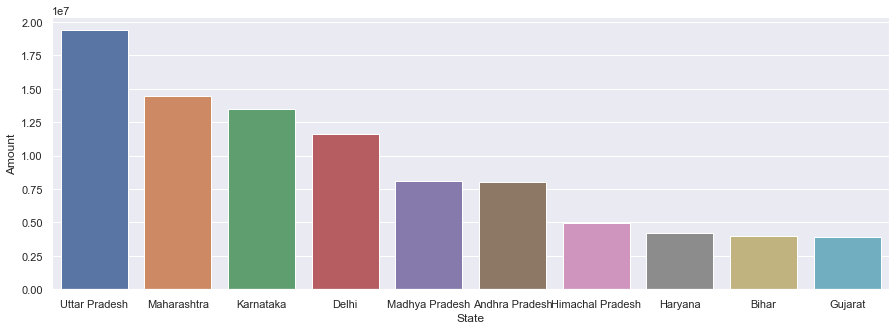

In [89]:
sales_state_amount=df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.barplot(data=sales_state_amount,x='State',y='Amount')

### marital status

In [91]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

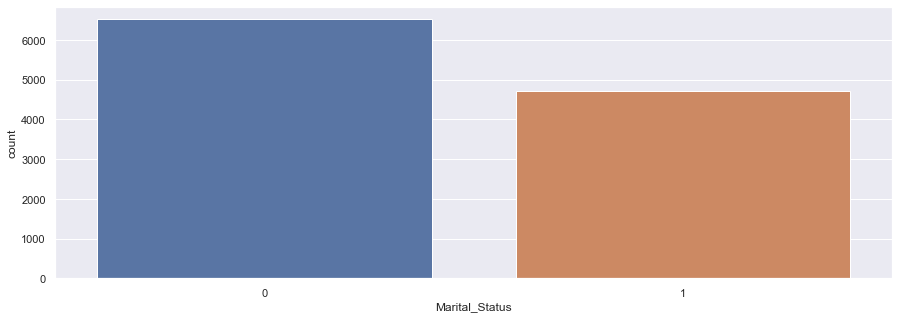

In [90]:
ax=sns.countplot(x='Marital_Status',data=df)

<AxesSubplot:xlabel='Marital_Status', ylabel='Amount'>

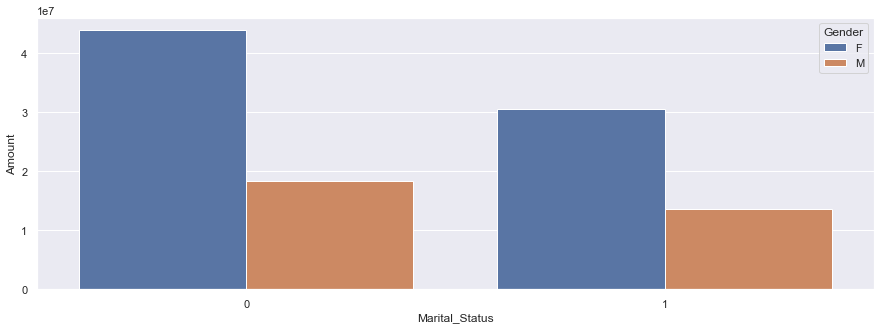

In [96]:
sales_MS=df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.barplot(x='Marital_Status',y='Amount',data=sales_MS,hue='Gender')

#1e7==1 to power 7

#### occupation

In [97]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

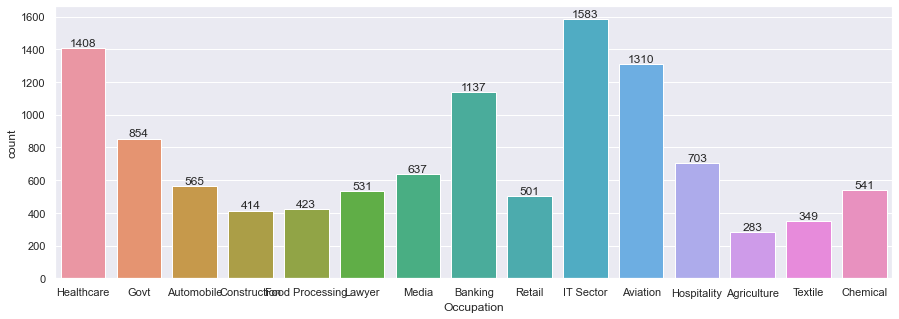

In [99]:
ax=sns.countplot(data=df,x='Occupation')
for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Occupation', ylabel='Amount'>

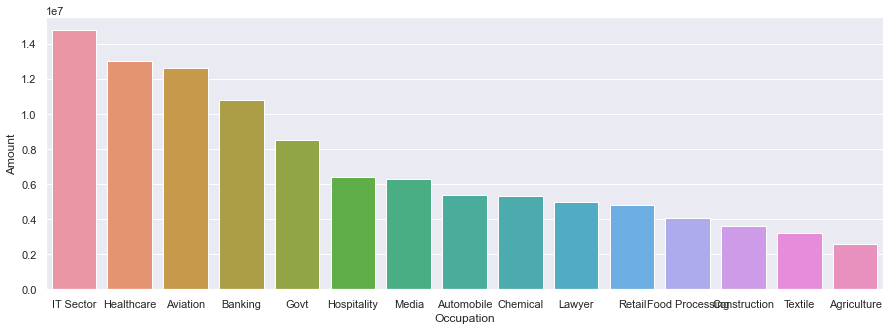

In [100]:
#purchasing power

sales_occup=df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(data=sales_occup,x='Occupation',y='Amount')

#### we see that people with occupation in IT sector,Healthcare aviation banking have more purchase power

### product category

In [101]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

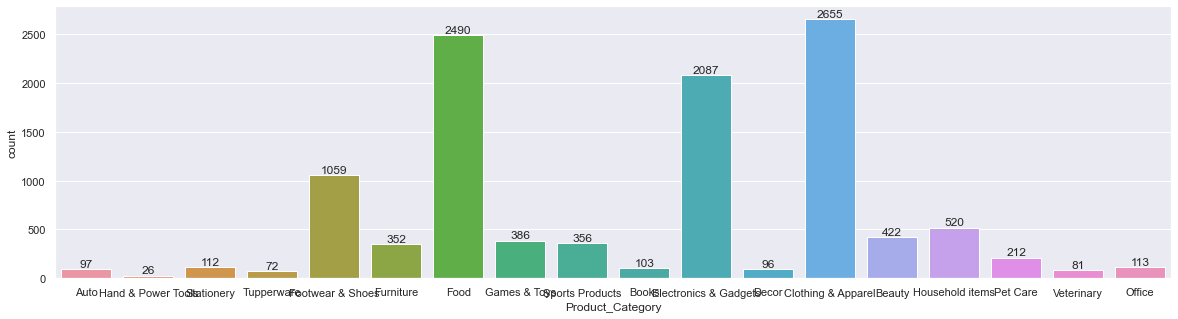

In [104]:
sns.set(rc={'figure.figsize':(20,5)})
ax=sns.countplot(data=df,x='Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)


<AxesSubplot:xlabel='Product_Category', ylabel='Amount'>

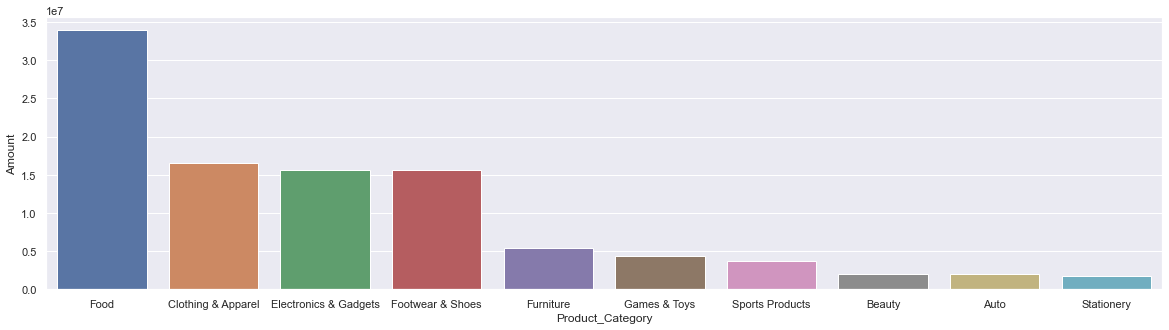

In [107]:
product_sales=df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10
                                                                                                                           )
sns.barplot(data=product_sales,x='Product_Category',y='Amount')

#### from the above graph we can say most sold products are from food,clothing,electronics,footwear

In [108]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<AxesSubplot:xlabel='Product_ID', ylabel='Orders'>

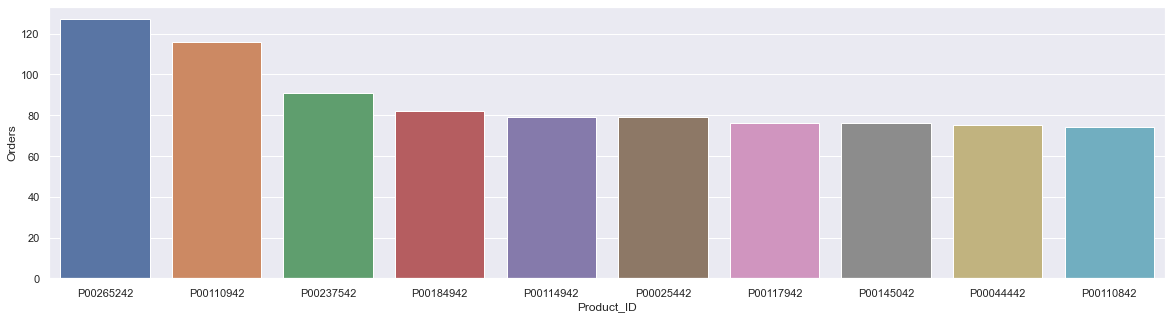

In [110]:
product_id=df.groupby(['Product_ID'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.barplot(data=product_id,x='Product_ID',y='Orders')

In [111]:
#products that have highest orders

### Married women age group 26-35 yrs from up ,maharastra and karnataka working in IT,healthcare,aviation are more likely to buy product from food ,clothing and electronics category

In [112]:
# performed data cleaning and manipulation
# performed exploratory data analysis(EDA) using pandas,numpy and seaborn libraries.
#improved customer experience by identifying potential customer across different states,occupation,gender,and age group.
#improved sales by identifying most selling product categories and products which help to plan inventory and hence meet demands.